In [1]:
import ciso8601
import sqlite3
import time

import numpy as np
import pandas
import talib
%matplotlib inline
import matplotlib.pyplot as plt
import os


if os.getcwd() is not '/Users/bsdo/project/python/BSTrade':
    os.chdir(os.getcwd() + '/../')


def get_df(path=None):
    if path is None:
        path = ''

    conn = sqlite3.connect(path + "bitmex.db")
    c = conn.cursor()

    s = time.perf_counter()
    symbol = 'XBTUSD'
    count = 300000
    c.execute("SELECT * FROM tradebin1m"
              " ORDER BY timestamp"
              " LIMIT ?"
              " OFFSET (SELECT COUNT(*) FROM tradebin1m) - ?"
              , [count, count]
              )
    print('execute : ', (time.perf_counter() - s) / 1_000_000)

    s = time.perf_counter()
    d = c.fetchall()
    print('fetchall : ', (time.perf_counter() - s) / 1_000_000)
    
    ts = [ciso8601.parse_datetime(item[1]) for item in d]
    close = [item[6] for item in d]
    
    conn.close()
    return np.array(close), ts

BS_PATH = 'BSTrade/Data/bitmex/'


In [2]:

def get_bbr(close, r = range(20,5000,20)):
    a = []
    for minute in r:
        upper, middle, lower = talib.BBANDS(close, timeperiod=minute)
        a.append((close - lower) / (upper - lower))
    return np.array(a)


In [3]:
os.getcwd()

'/Users/bsdo/project/python/BSTrade'

In [4]:
def shift(arr, num, fill_value=np.nan):
    result = np.empty_like(arr)
    if num > 0:
        result[:num] = fill_value
        result[num:] = arr[:-num]
    elif num < 0:
        result[num:] = fill_value
        result[:num] = arr[-num:]
    else:
        result = arr
    return result

In [5]:
def minute(m):
    return m * 20
# make_bbr(minute(10))
# make_bbr(minute(15))
# make_bbr(minute(30))
# make_bbr(minute(45))
# make_bbr(minute(60))
# make_bbr(minute(90))
# make_bbr(minute(120))
# make_bbr(minute(180))
# make_bbr(minute(240))
# make_bbr(minute(360))
# make_bbr(minute(480))

In [6]:

def plot(np_data):
    ax = pandas.Series(np_data[-start:end]).plot(figsize=fig_size, linewidth=1)
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_major_formatter(plt.NullFormatter())

close, ts = get_df(BS_PATH)

execute :  1.9924826902570203e-07
fetchall :  1.3999416549922898e-06


/Users/bsdo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/bsdo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


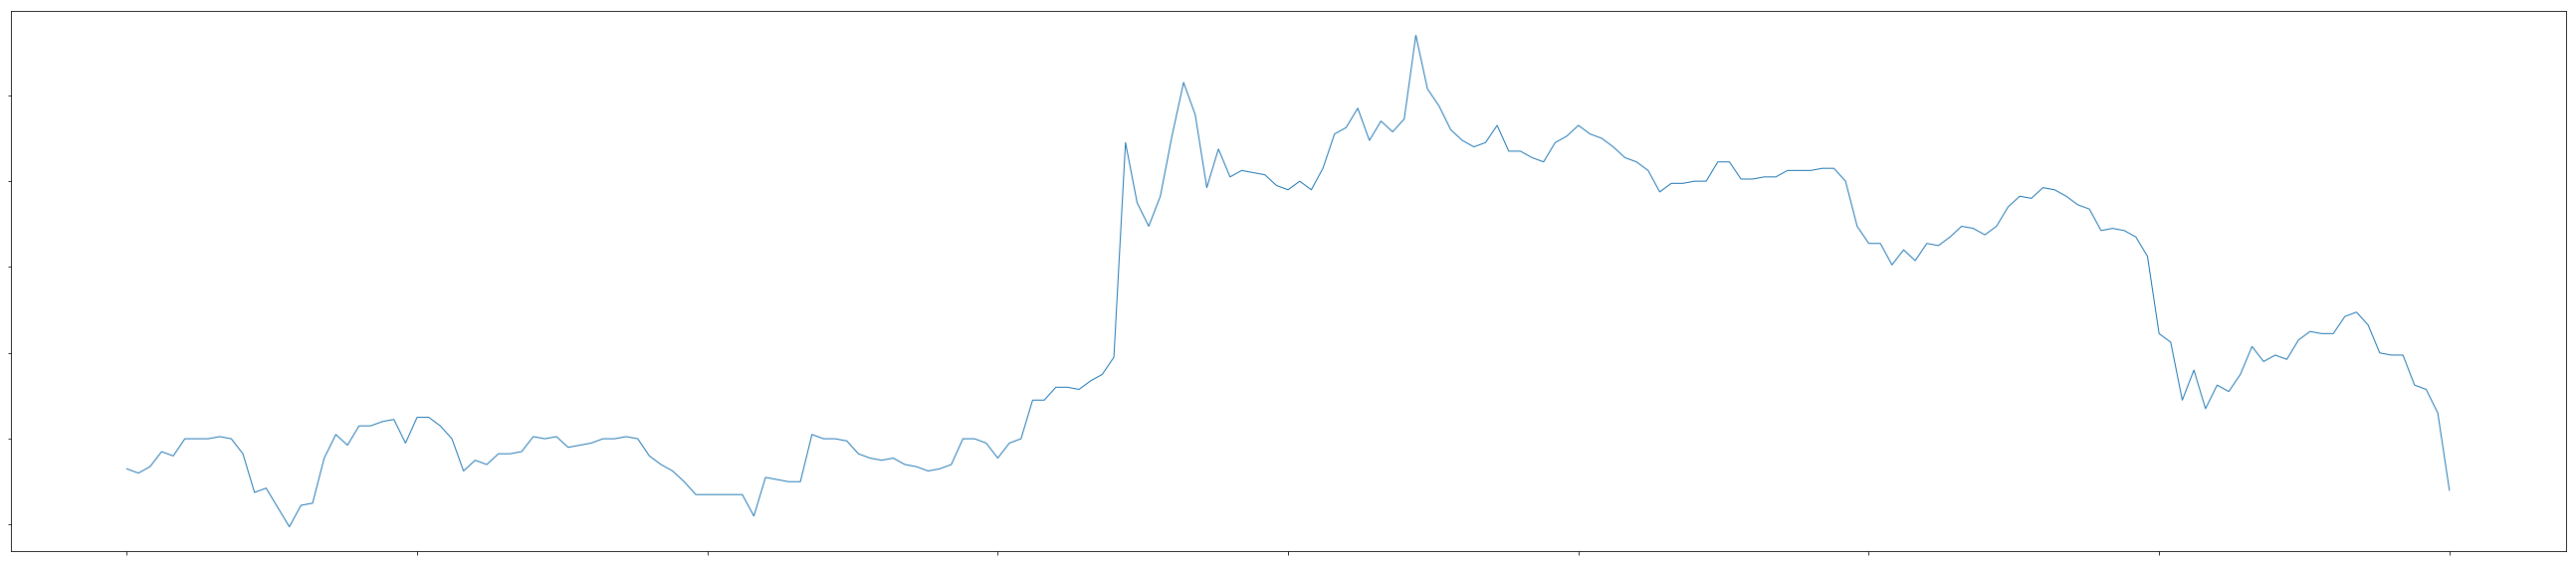

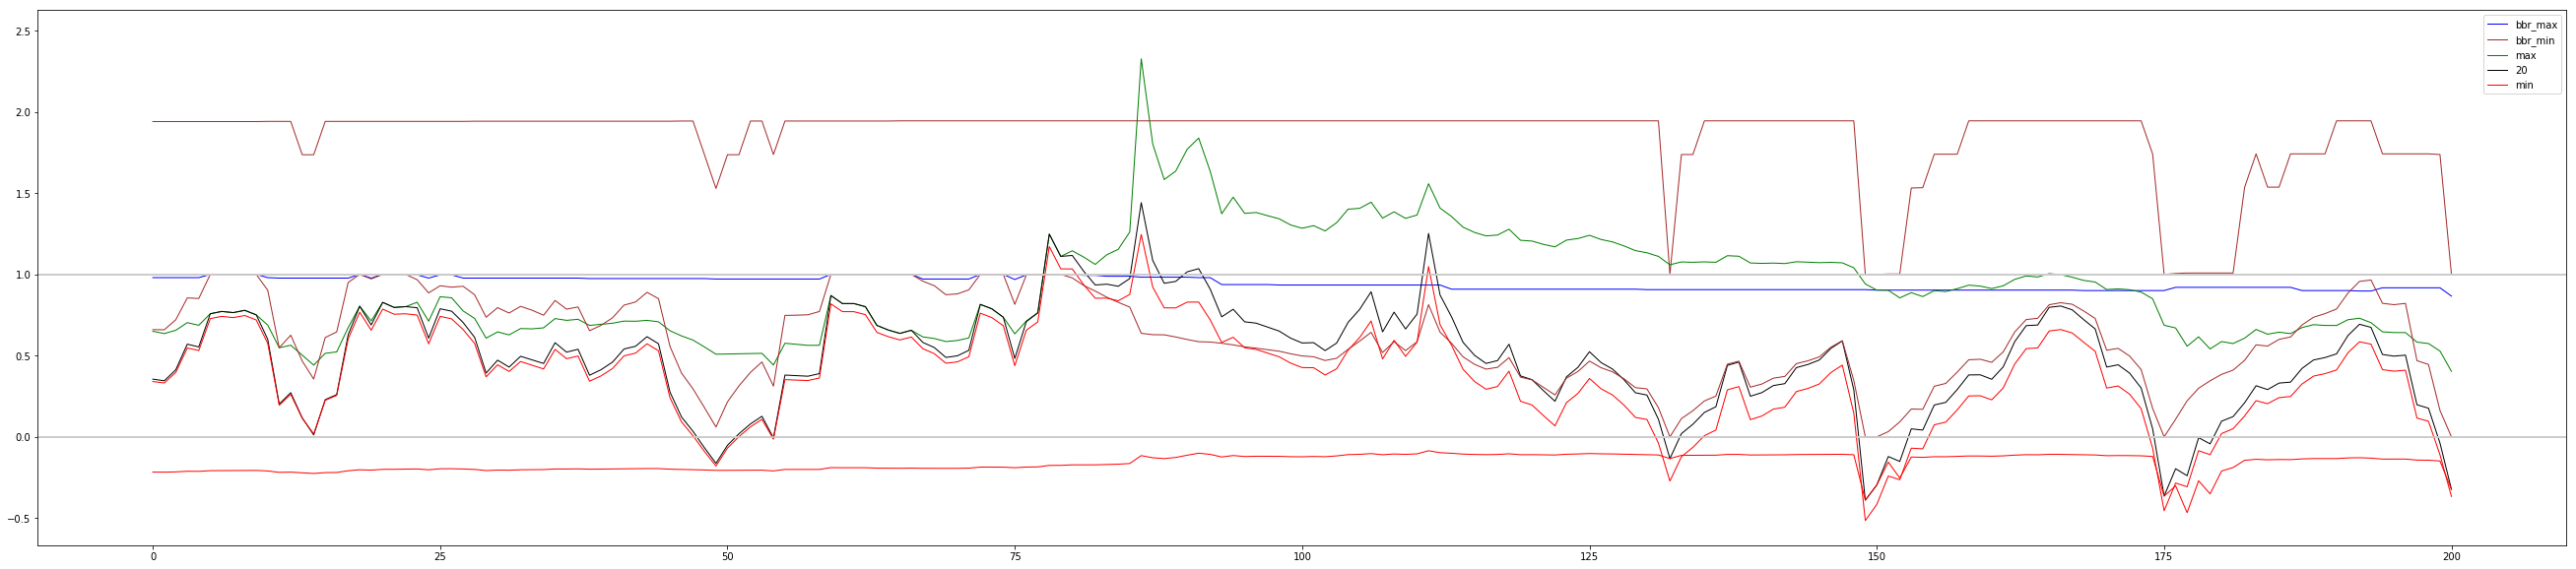

In [23]:
def make_bbr(bbr, max_line=300):
    bbr_temp = bbr[:max_line, -start:end]
    
    bbr_max_id = bbr_temp.argmax(axis=0) / max_line
    bbr_min_id = bbr_temp.argmin(axis=0) / max_line
    return bbr_max_id, bbr_min_id

def indi(bbr, max_line):
    s_max, s_min = make_bbr(bbr, minute(10))

    ma, mi = make_bbr(bbr, minute(15))
    s_max = s_max + ma
    s_min = s_min + mi
    ma, mi = make_bbr(bbr, minute(30))
    s_max = s_max + ma
    s_min = s_min + mi
    ma, mi = make_bbr(bbr, minute(45))
    s_max = s_max + ma
    s_min = s_min + mi
    ma, mi = make_bbr(bbr, minute(60))
    s_max = s_max + ma
    s_min = s_min + mi
    ma, mi = make_bbr(bbr, minute(90))
    s_max = s_max + ma
    s_min = s_min + mi
    ma, mi = make_bbr(bbr, minute(120))
    s_max = s_max + ma
    s_min = s_min + mi
    ma, mi = make_bbr(bbr, minute(180))
    s_max = s_max + ma
    s_min = s_min + mi
    ma, mi = make_bbr(bbr, minute(240))
    s_max = s_max + ma
    s_min = s_min + mi
    ma, mi = make_bbr(bbr, minute(360))
    s_max = s_max + ma
    s_min = s_min + mi
    ma, mi = make_bbr(bbr, minute(480))
    s_max = s_max + ma
    s_min = s_min + mi

    df_bbr = pandas.DataFrame()
    df_bbr['bbr_max'] = (-s_max / 4.8 ) + 1
    df_bbr['bbr_min'] = (s_min / 4.8) + 1

    df_bbr['max'] = np.amax(bbr[:max_line, -start:end], axis=0)
    df_bbr[str(20 * 1)] = bbr[0, -start:end]
#     df_bbr[str(20 * 5)] = bbr[4, -start:end]
#     df_bbr[str(20 * 10)] = bbr[9, -start:end]
#     df_bbr[str(20 * 15)] = bbr[14, -start:end]
#     df_bbr[str(20 * 30)] = bbr[29, -start:end]
#     df_bbr[str(20 * 60)] = bbr[59, -start:end]
    
    df_bbr['min'] = np.amin(bbr[:max_line, -start:end], axis=0)

    y_lim = (
        np.min(np.nan_to_num(df_bbr.values.flatten())) - 0.2, 
        np.max(np.nan_to_num(df_bbr.values.flatten())) + 0.3
      )

    ax = df_bbr.plot(figsize=fig_size, linewidth=1, color=['blue', 'brown', 'green', 'black', 'red'], ylim=y_lim)
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.axhline(y=0, color='#cccccc')
    ax.axhline(y=1, color='#cccccc')
    
    d3 = ((df_bbr['20'] - df_bbr['min']) / (df_bbr['max'] - df_bbr['min']))
    y_lim = (np.min(d3.values.flatten()) - 0.2, np.max(d3.values.flatten()) + 0.3)
    ax = d3.plot(figsize=fig_size, linewidth=1, color='brown')
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.axhline(y=0, color='#cccccc')
    ax.axhline(y=1, color='#cccccc')


    d4 = df_bbr['20'] - pandas.Series(np.average(bbr.T, axis=1)[-start:end])
    ax = d4.plot(figsize=fig_size, linewidth=1, color='red')
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.axhline(y=0, color='#cccccc')
    ax.axhline(y=1, color='#cccccc')
    
    return df_bbr


max_line = minute(480)
bbr = get_bbr(close, range(20, max_line+1, 20))
times = 1
length = 200
start = times * length + 1
end = None
# end = -start+length
fig_size = (46, 10)

plot(close)
df = indi(bbr, max_line)

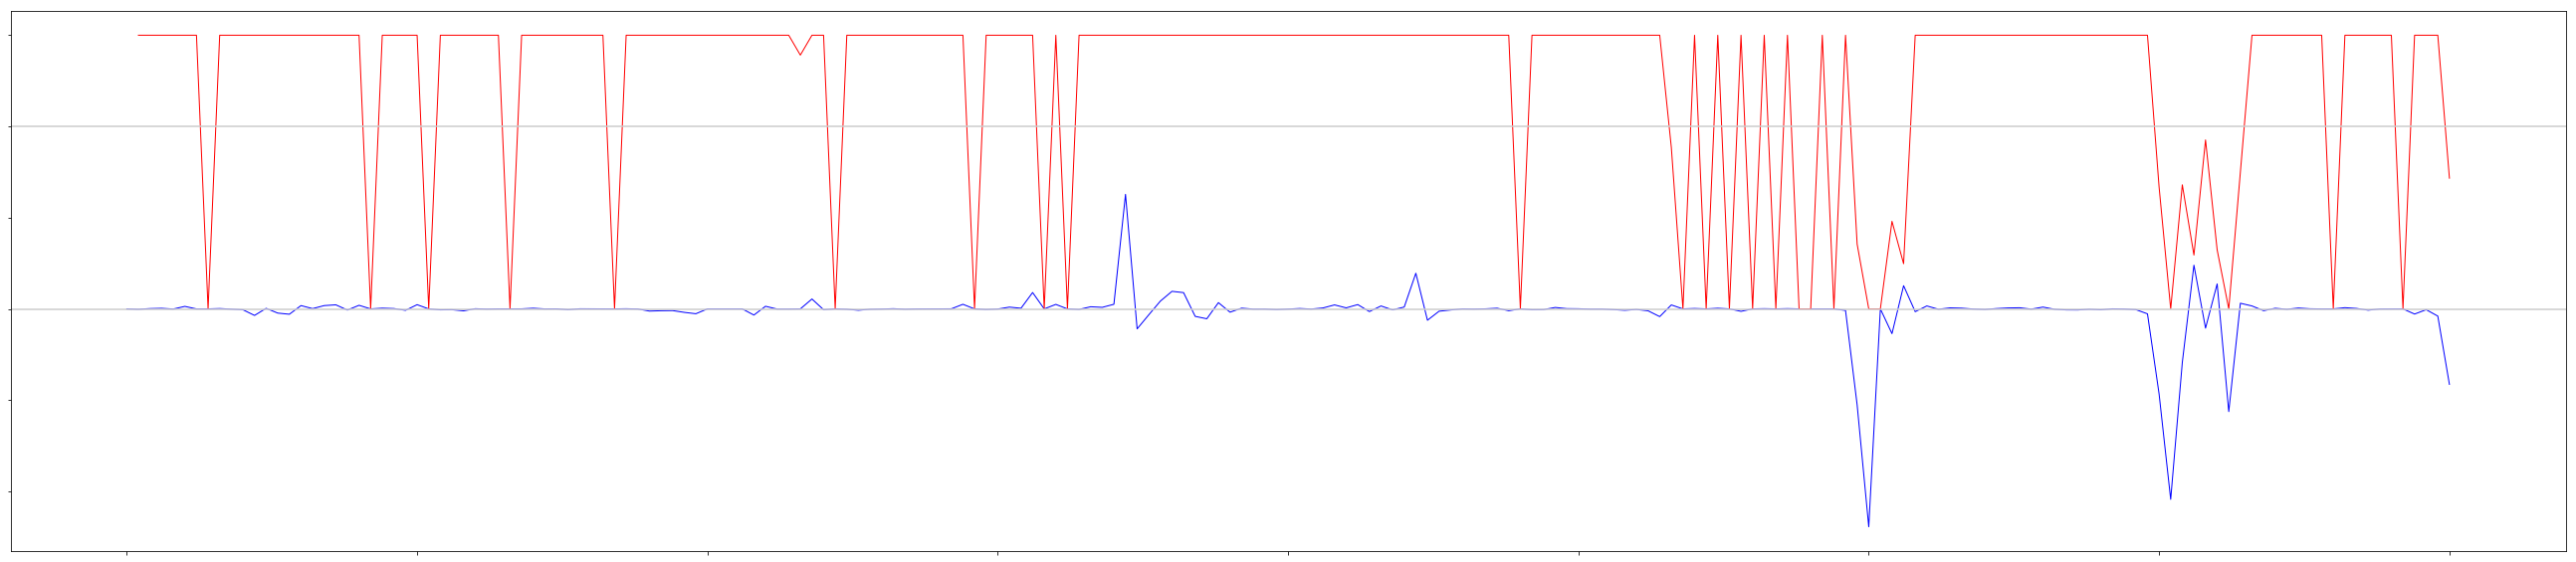

In [16]:
d = (df['max'] - df['max'].shift()) / (df['min'] - df['min'].shift())
max_v = 1.5
d.loc[d > max_v] = max_v
d.loc[d < 0] = 0

df['close_incl'] = close[-start:end] - shift(close[-start:end], 1)
max_v = 1.5
d2 = (df['close_incl'] / d) / 50
d2 = d2.replace([np.nan], 0)
d2 = d2.replace([np.inf], max_v)
d2 = d2.replace([-np.inf], -max_v)
d2 = d2 * abs((df['20'] - 0.5))

d2.loc[d2 > max_v] = max_v
d2.loc[d2 < -max_v] = -max_v

d2.plot(figsize=fig_size, linewidth=1, color=['blue'])
ax = d.plot(figsize=fig_size, linewidth=1, color=['red'])
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.axhline(y=0, color='#cccccc')
ax.axhline(y=1, color='#cccccc')

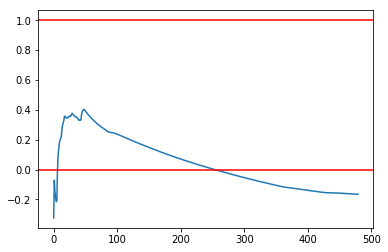

In [17]:
ax = pandas.Series(bbr.T[-1]).plot()
ax.axhline(y=0, color='r')
ax.axhline(y=1, color='r')

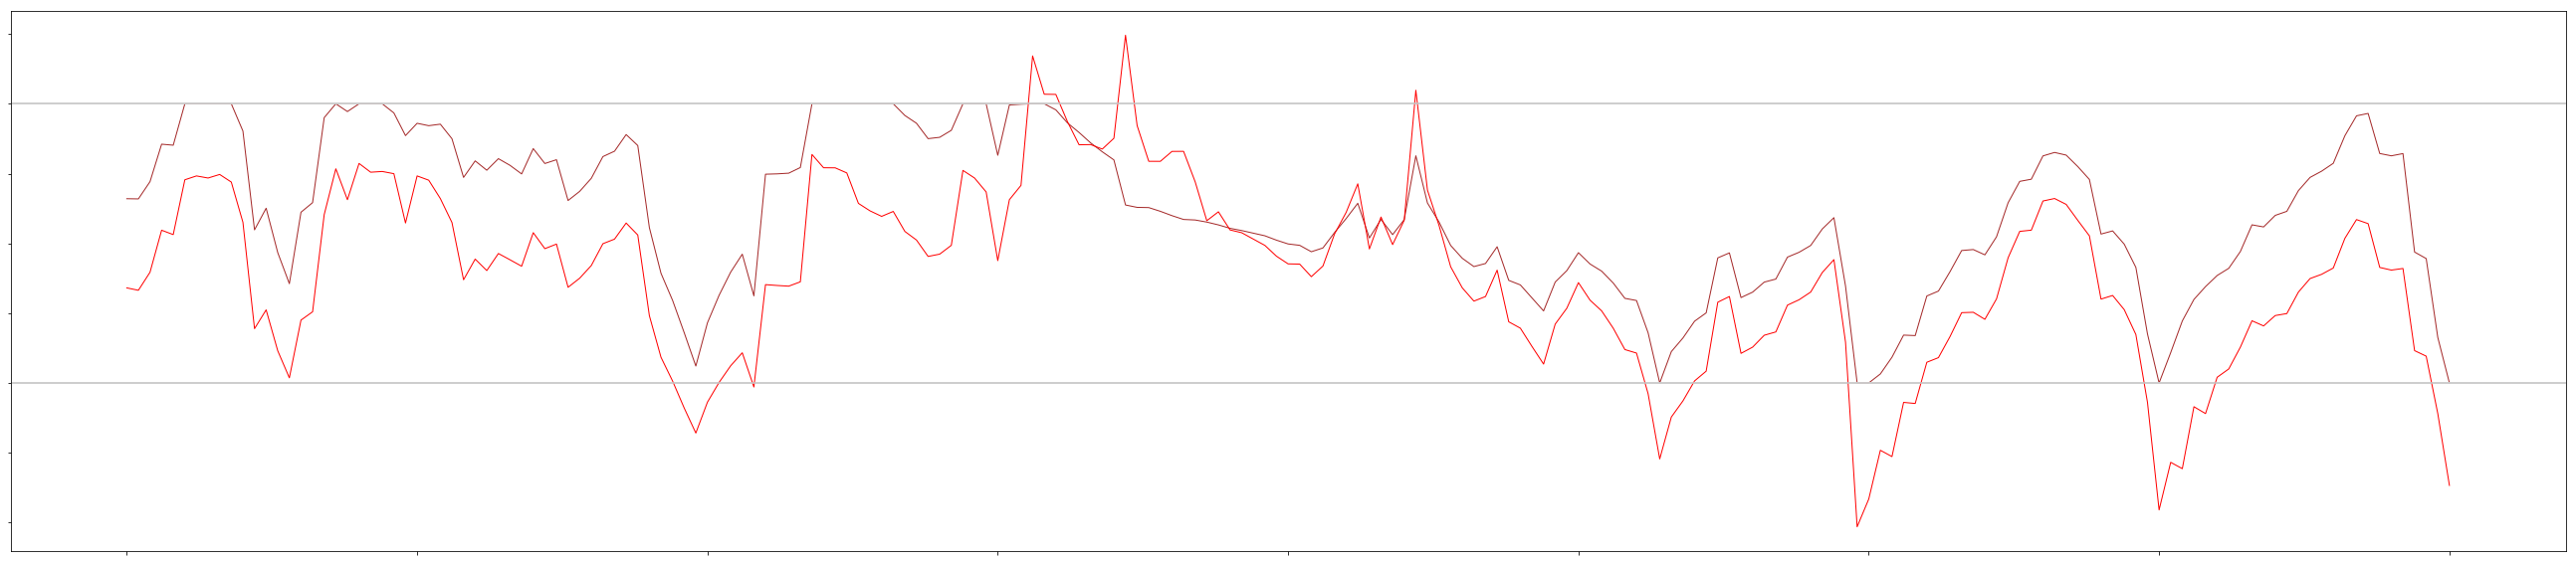

In [18]:
d3 = ((df['20'] - df['min']) / (df['max'] - df['min']))
y_lim = (np.min(d3.values.flatten()) - 0.2, np.max(d3.values.flatten()) + 0.3)
ax = d3.plot(figsize=fig_size, linewidth=1, color='brown')
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.axhline(y=0, color='#cccccc')
ax.axhline(y=1, color='#cccccc')


d4 = df['20'] - pandas.Series(np.average(bbr.T, axis=1)[-start:end])
y_lim = (np.min(d3.values.flatten()) - 0.2, np.max(d3.values.flatten()) + 0.3)
ax = d4.plot(figsize=fig_size, linewidth=1, color='red')
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.axhline(y=0, color='#cccccc')
ax.axhline(y=1, color='#cccccc')


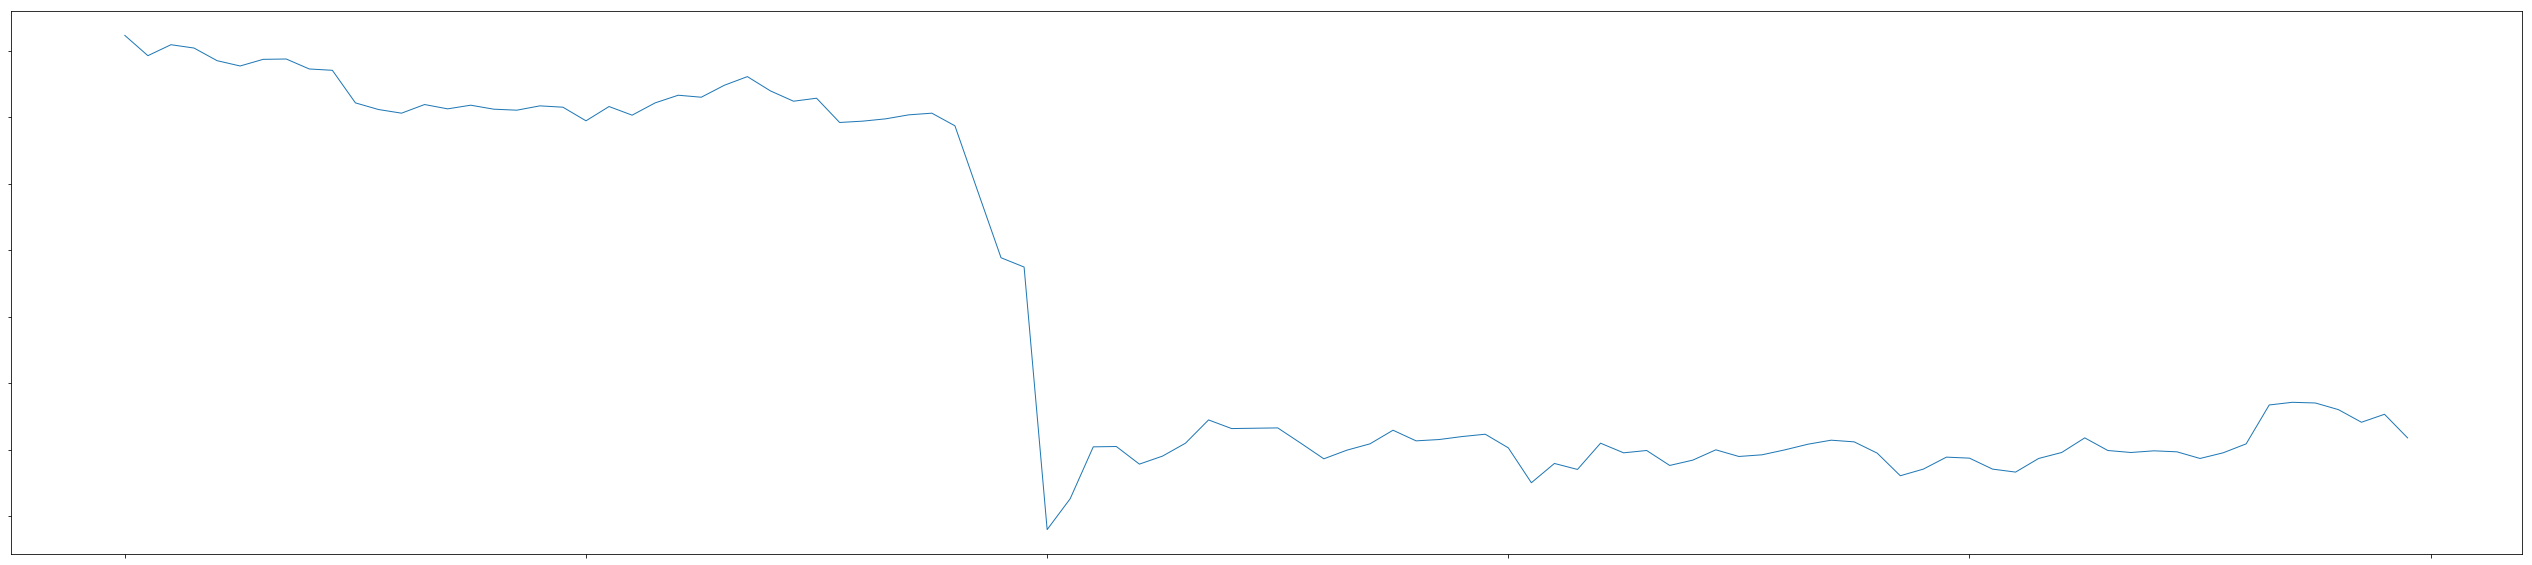

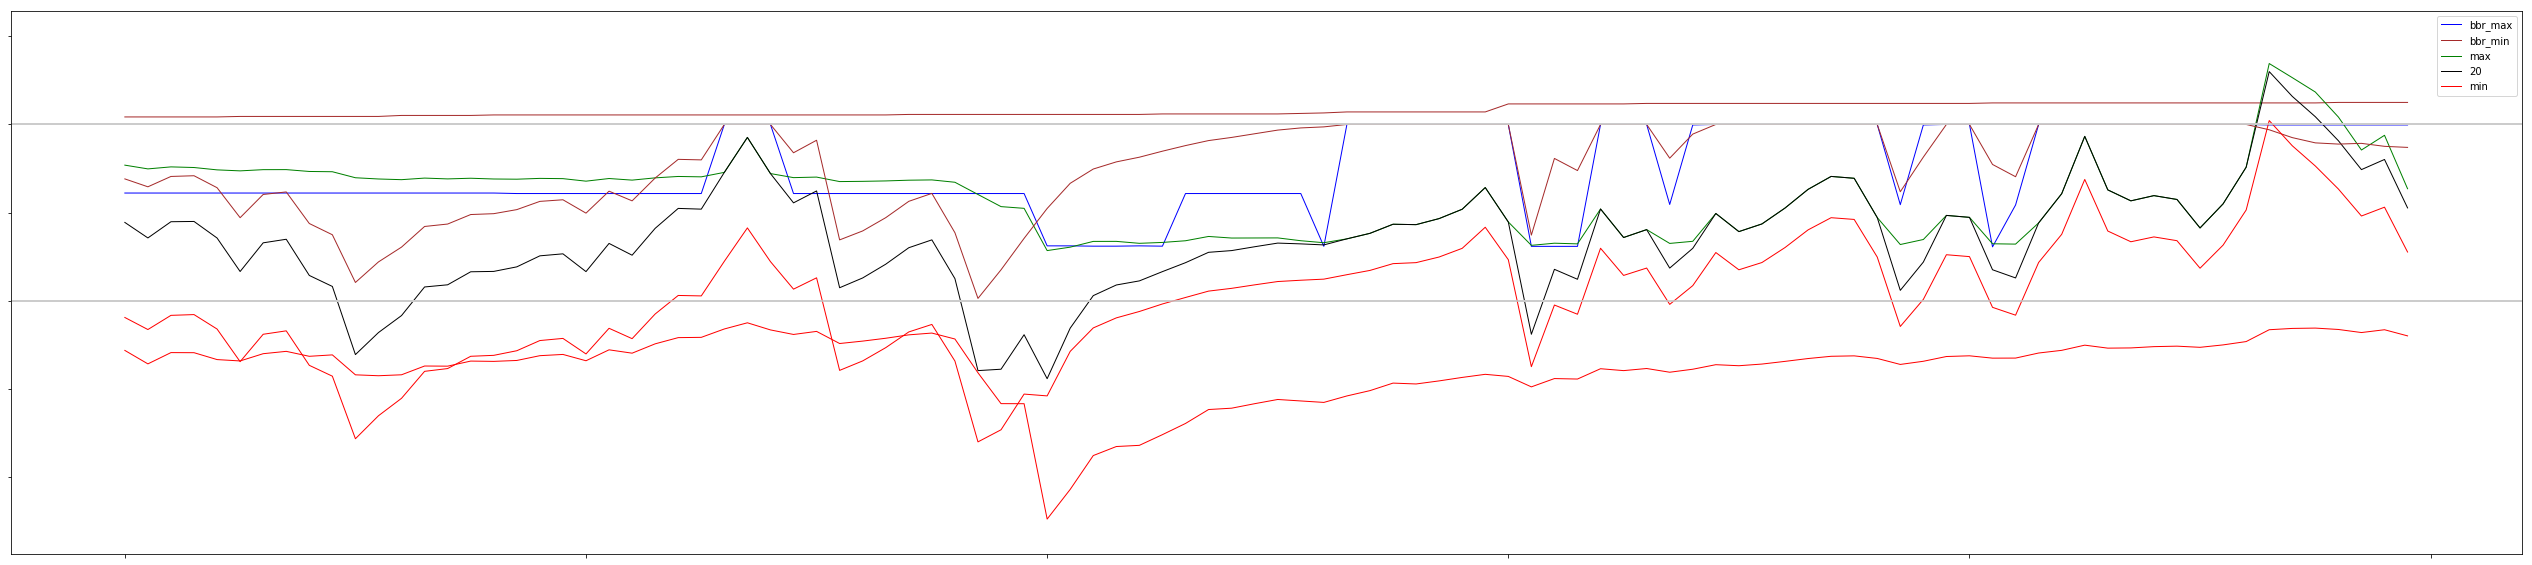

In [11]:

max_line = minute(480)
bbr = get_bbr(pandas.Series(close, index=ts).resample('15Min').agg('first').values, range(20, max_line+1, 20))
times = 1
length = 100
start = times * length + 1
end = None
end = -start+length
fig_size = (45, 10)

plot(pandas.Series(close, index=ts).resample('15Min').agg('first').values)
df = indi(bbr, max_line)

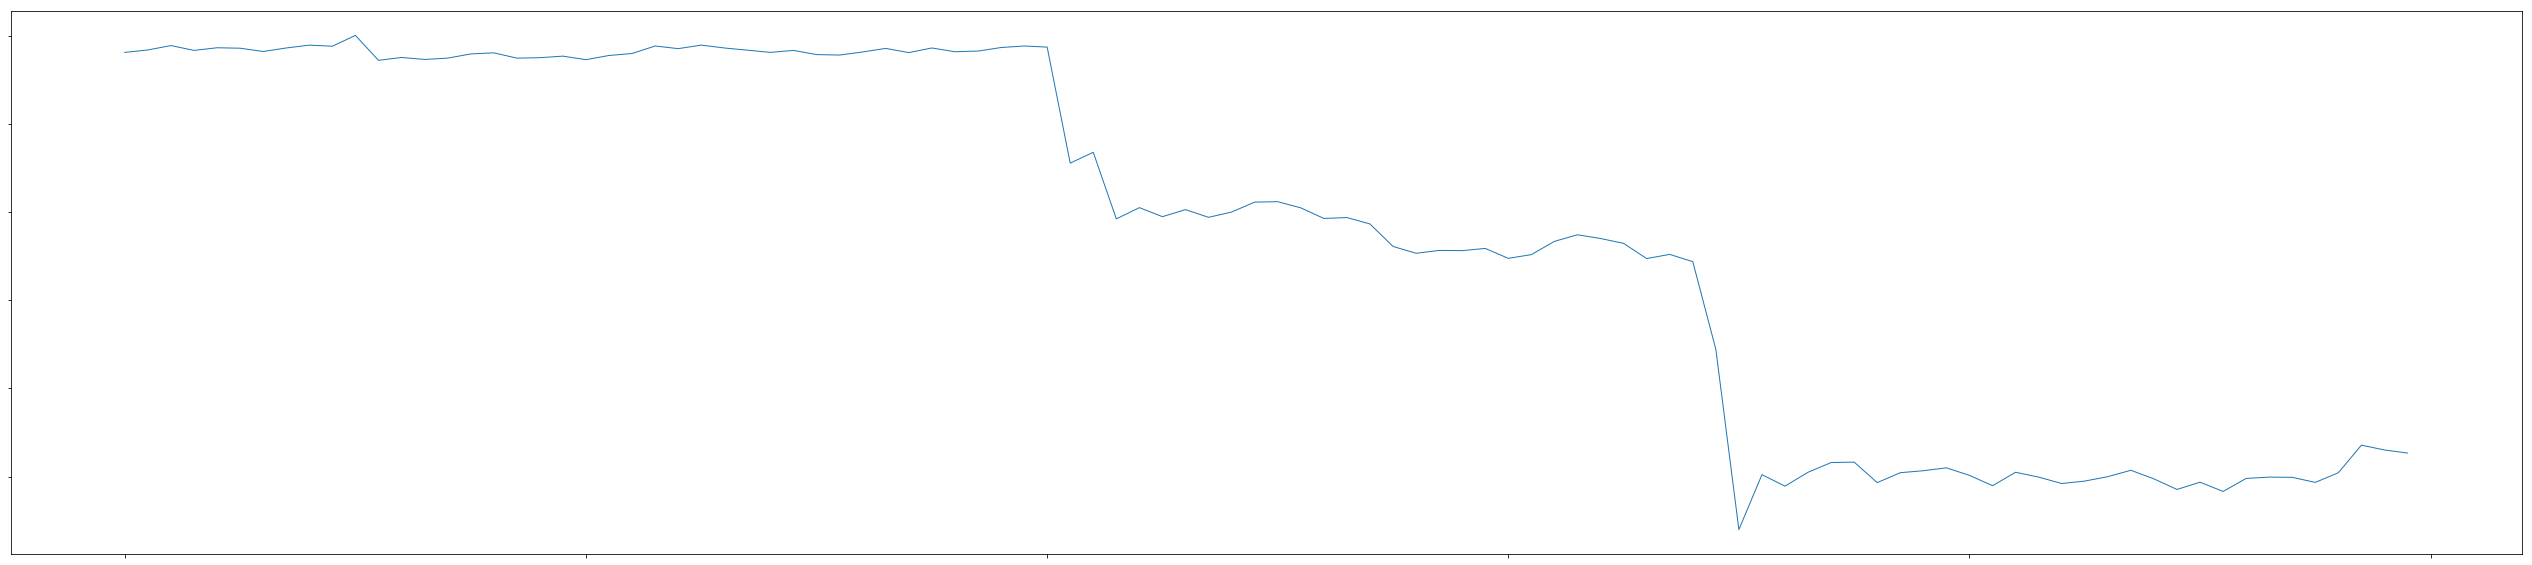

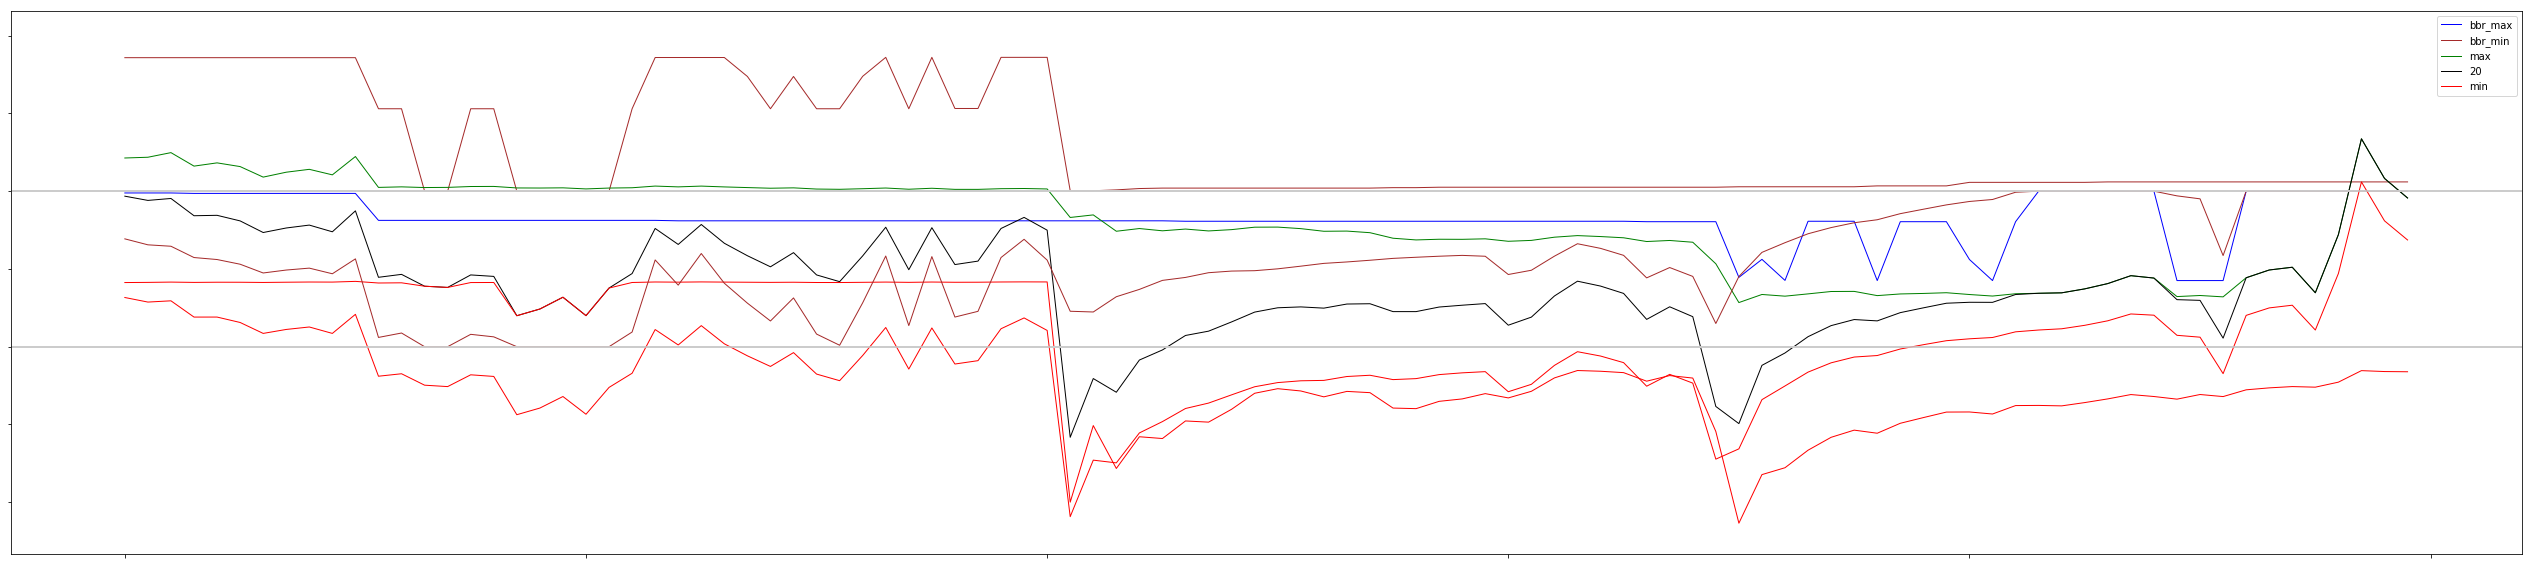

In [12]:

max_line = minute(480)
bbr = get_bbr(pandas.Series(close, index=ts).resample('30Min').agg('first').values, range(20, max_line+1, 20))
times = 1
length = 100
start = times * length + 1
end = None
end = -start+length
fig_size = (45, 10)

plot(pandas.Series(close, index=ts).resample('30Min').agg('first').values)
df = indi(bbr, max_line)

In [13]:
pandas.Series(close, index=ts).resample('30Min').agg('first').values.shape

(10001,)

/Users/bsdo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/bsdo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


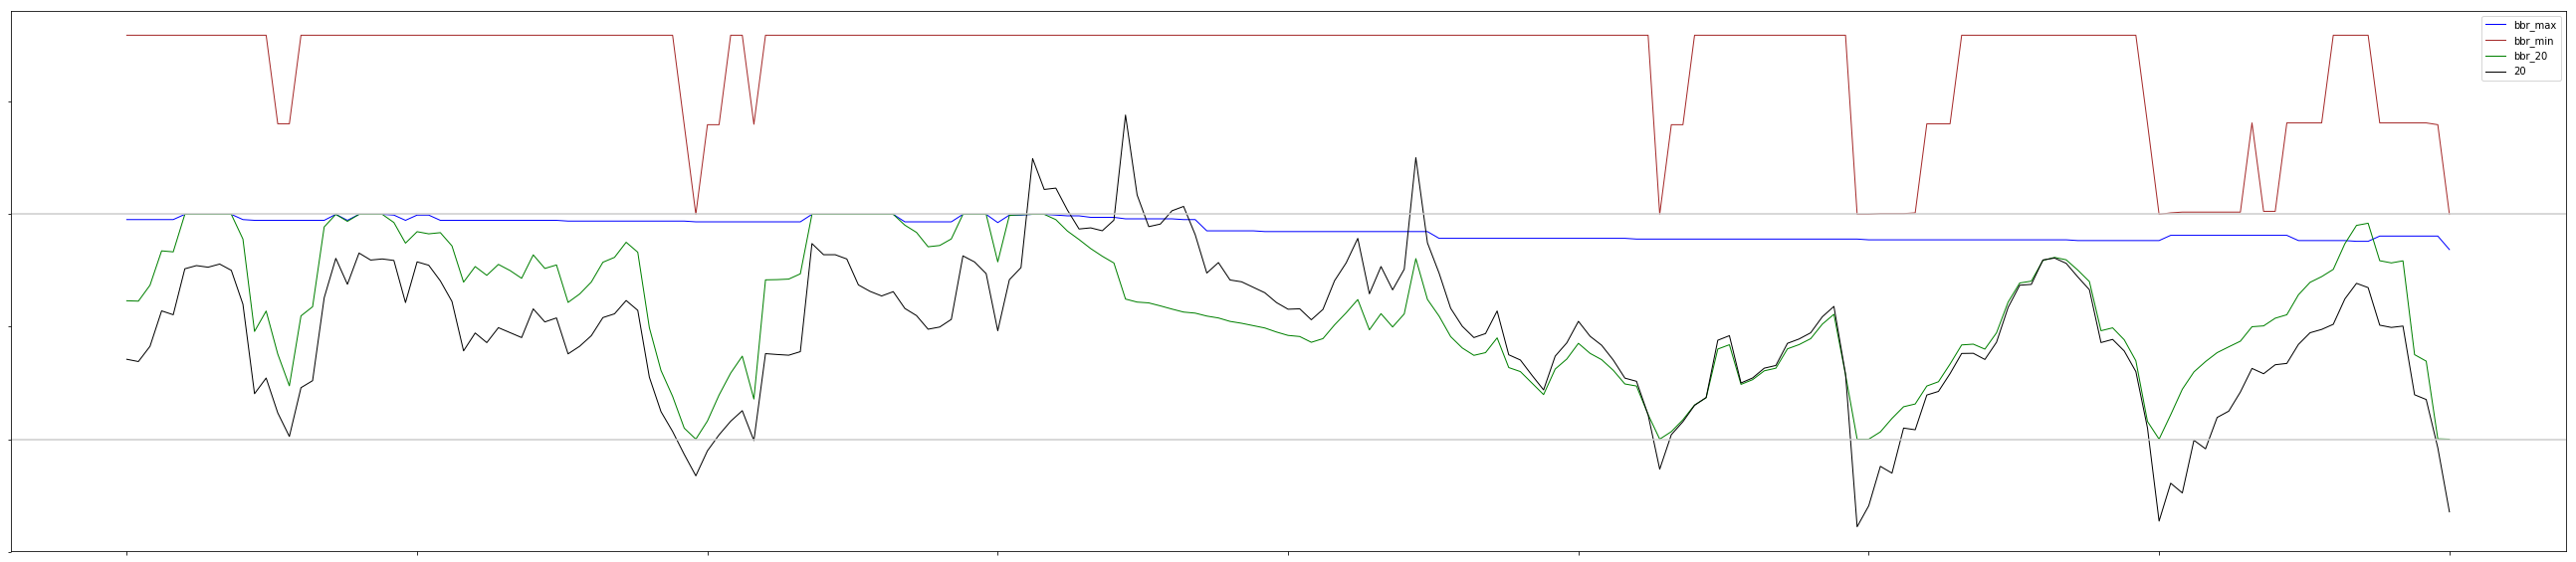

In [25]:
max_line = minute(300)
bbr = get_bbr(close, range(20, max_line+1, 20))
times = 1
length = 200
start = times * length + 1
end = None
# end = -start+length
fig_size = (46, 10)

s_max, s_min = make_bbr(bbr, minute(10))
ma, mi = make_bbr(bbr, minute(15))
s_max = s_max + ma
s_min = s_min + mi

df_bbr = pandas.DataFrame()
df_bbr['bbr_max'] = (-s_max / ((2 + 3) / 2)) + 1
df_bbr['bbr_min'] = (s_min /((2 + 3) / 2)) + 1

ma = np.amax(bbr[:max_line, -start:end], axis=0)
bbr_20 = bbr[0, -start:end]
mi = np.amin(bbr[:max_line, -start:end], axis=0)

df_bbr['bbr_20'] = (bbr_20 - mi) / (ma - mi)
df_bbr['20'] = bbr_20
ax = df_bbr.plot(figsize=fig_size, linewidth=1, color=['blue', 'brown', 'green', 'black', 'red'])
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.axhline(y=0, color='#cccccc')
ax.axhline(y=1, color='#cccccc')